<center><h1> Natural Language Processing Project </h1></center>


Data Science & Machine Learning


**Contributors**
- Lynette Wangari - lynettewangari26@gmail.com
- Jackson Munene - jacmwaniki@gmail.com
- Julius Kinyua - juliusczar36@gmail.com
- Philip Oluoch - philtonochieng254@gmail.com

# Business Understanding

## Overview

In today's technologically driven society, social media (especially Twitter) often acts as a central repository for thoughts, feelings, and opinions. Through the use of machine learning and natural language processing, we will identify users who have expressed dissatisfaction with Apple and Google products. The objective is to categorize tweets related to Apple and Google into positive, neutral, and negative sentiments, providing actionable insights for their advertising strategies.

In this project, we seek to understanding user sentiments towards Apple and Google products by leveraging Twitter sentiment analysis to gain insights into customer opinions and preferences regarding the products. The project involves collecting twitter data related to reviews of Apple and Google products, followed by preprocessing and sentiment analysis. The insights derived from this analysis will guide in optimizing its product assortment and ensuring a strategic alighnment with customer prefences.

### Challenges:

The lack of a systematic method for analyzing user sentiments on platforms like Twitter impedes data-driven stocking decisions. This project aims to use Twitter sentiment analysis to better understand customer opinions. By gaining insights into these sentiments to enhance stocking decisions, ensuring products are available in line with customer preferences, ultimately boosting overall satisfaction and loyalty.

### Business Problem:

The primary business problem is to ensure the best possibe experience for customers by accurately prediciting whether a given tweet expresses positive or negative sentiment about Apple or Google products. Misclassifying negative sentiments as positive can lead to misleading insights, which might result in poor strategic decisions.


### Research Questions

- What are the main sentiments expressed by customers on Twitter regarding iPhone and Google products?

- What factors affect the polarity of tweets related to iPhone and Google products on Twitter?

- Which specific features of iPhone and Google products are most commonly praised or criticized by users on Twitter?

- Which machine learning model is the most effective for sentiment analysis?

## Data Understanding

- Contributors evaluated tweets about multiple brands and products. The crowd was asked if the tweet expressed positive, negative, or no emotion towards a brand and/or product. If some emotion was expressed they were also asked to say which brand or product was the target of that emotion.

- The tweets included were sent out during the South by South West conference, mostly about Google and Apple products that was put together in 2013.

- The dataset includes 9,093 rows. There are three columns, the first column includes the tweet text, the second column is the subject of the tweet and third column is the emotion of the tweet.

- Data comes from CrowdFlower via data.world.

- Human raters rated the sentiment in over 9,000 Tweets as positive, negative, neither or "can't tell". "Can't tell" really is not of much use to us for this analysis and will be dropped.



##  Data Preparation

### Preview the data

Let's first import the various libraries we will use in our analysis and preview the data.

In [10]:
#Installing natural language toolkit
!pip install nltk

In [11]:
#Installing scikit learn
!pip install scikit-learn

In [12]:
#installing worldcloud to access seaborn. 
pip install wordcloud matplotlib seaborn

SyntaxError: invalid syntax (716641180.py, line 2)

In [111]:
#import libraries
import pandas as pd
import numpy as np

#Natural language toolkit
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string

import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

#sklearn
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve, auc

In [113]:
# Load data and check structure
df = pd.read_csv('tweets.csv', encoding='latin1')
df

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion
...,...,...,...
9088,Ipad everywhere. #SXSW {link},iPad,Positive emotion
9089,"Wave, buzz... RT @mention We interrupt your re...",NaN,No emotion toward brand or product
9090,"Google's Zeiger, a physician never reported po...",NaN,No emotion toward brand or product
9091,Some Verizon iPhone customers complained their...,NaN,No emotion toward brand or product


The tweets contain mentions, hashtags, and external links to various websites. In order to make manipulation of the dataframe easier, we will rename the columns to something simpler.

In [116]:
#Renaming columns to easier names
df.rename(columns={'tweet_text':'tweet', 'emotion_in_tweet_is_directed_at':'brand_product', 
                  'is_there_an_emotion_directed_at_a_brand_or_product':'sentiment'}, inplace=True)
df

,tweet,brand_product,sentiment
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion
...,...,...,...
9088,Ipad everywhere. #SXSW {link},iPad,Positive emotion
9089,"Wave, buzz... RT @mention We interrupt your re...",NaN,No emotion toward brand or product
9090,"Google's Zeiger, a physician never reported po...",NaN,No emotion toward brand or product
9091,Some Verizon iPhone customers complained their...,NaN,No emotion toward brand or product


We have a total of 9093 tweets. Next we will examine the tweets based on sentiment.

In [119]:
#check for null values in columns
df.isna().sum()

tweet               1
brand_product    5802
sentiment           0
dtype: int64

## Exploratory Data Analysis

In [121]:
#calculating the frequency of unique values in the 'brand_product' column
brand_counts = df['brand_product'].value_counts()
brand_counts

brand_product
iPad                               946
Apple                              661
iPad or iPhone App                 470
Google                             430
iPhone                             297
Other Google product or service    293
Android App                         81
Android                             78
Other Apple product or service      35
Name: count, dtype: int64

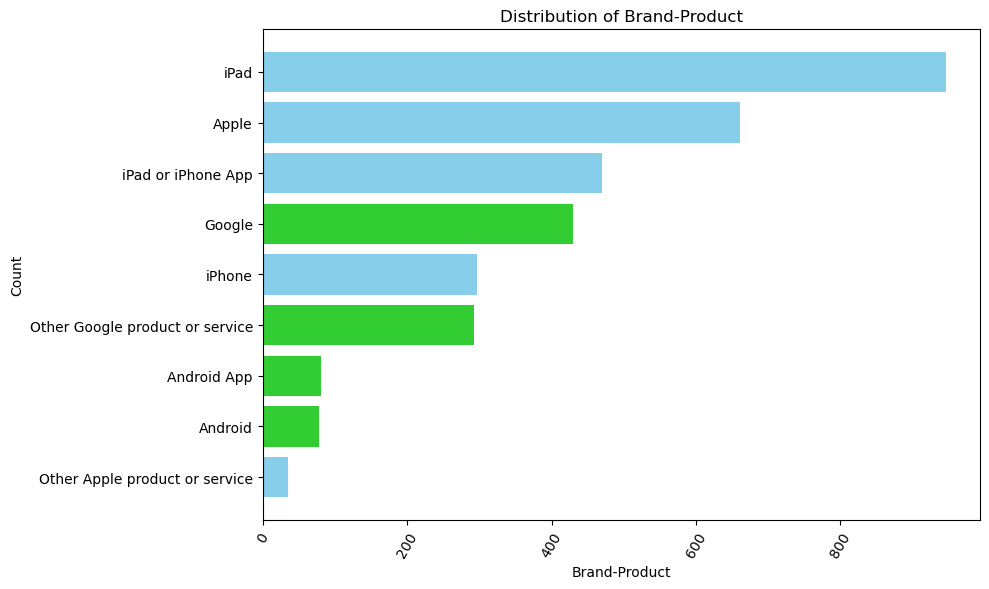

In [122]:

#sorting the Series based on its values in ascending order.
brand_counts = brand_counts.sort_values(ascending = True)

# Brand Value_counts bar plot
plt.figure(figsize=(10, 6))
colors = [
    'skyblue' #highlight any apple product in blue 
    if brand.lower() in [
        'ipad', 
        'apple', 
        'ipad or iphone app', 
        'iphone', 
        'other apple product or service'
    ] 
    else 'limegreen' for brand in brand_counts.index #highlight any google product in limegreen
]

plt.barh(brand_counts.index, brand_counts.values, color=colors)
plt.xlabel('Brand-Product')
plt.ylabel('Count')
plt.title('Distribution of Brand-Product')
plt.xticks(rotation=60) 

plt.tight_layout()
plt.show()

In [126]:
#calculating the frequency of unique values in the 'sentiment' column
senti_counts = df['sentiment'].value_counts()
senti_counts

sentiment
No emotion toward brand or product    5389
Positive emotion                      2978
Negative emotion                       570
I can't tell                           156
Name: count, dtype: int64

In [128]:
#looking at data 
print(df.info())
print(("-"*20))

#duplicates
print('Total duplicated rows')
print(df.duplicated().sum())
print(("-"*20))

#null values
print('Total null values')
print(df.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   tweet          9092 non-null   object
 1   brand_product  3291 non-null   object
 2   sentiment      9093 non-null   object
dtypes: object(3)
memory usage: 213.2+ KB
None
--------------------
Total duplicated rows
22
--------------------
Total null values
tweet               1
brand_product    5802
sentiment           0
dtype: int64


In [130]:
#Simplify sentiment labels for visualizations
dict_sent = {'No emotion toward brand or product':"No emotion", 
             'Positive emotion':'Positive',
             'Negative emotion':'Negative',
             "I can't tell": 'Invalid'}
df['sentiment'] = df['sentiment'].map(dict_sent)

In [132]:
#sentiment breakdown
df['sentiment'].value_counts()

sentiment
No emotion    5389
Positive      2978
Negative       570
Invalid        156
Name: count, dtype: int64

In [134]:
#drop NaN in the Tweet column
df['tweet'].dropna(inplace=True)
df

,tweet,brand_product,sentiment
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive
...,...,...,...
9088,Ipad everywhere. #SXSW {link},iPad,Positive
9089,"Wave, buzz... RT @mention We interrupt your re...",NaN,No emotion
9090,"Google's Zeiger, a physician never reported po...",NaN,No emotion
9091,Some Verizon iPhone customers complained their...,NaN,No emotion


In [136]:
#drop duplicates
df.drop_duplicates(inplace=True)
df

,tweet,brand_product,sentiment
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive
...,...,...,...
9088,Ipad everywhere. #SXSW {link},iPad,Positive
9089,"Wave, buzz... RT @mention We interrupt your re...",NaN,No emotion
9090,"Google's Zeiger, a physician never reported po...",NaN,No emotion
9091,Some Verizon iPhone customers complained their...,NaN,No emotion


In [138]:
# Dropping the row above with missing value in tweet_text
df.drop(index=df[df['tweet'].isna()].index, inplace= True)
df

,tweet,brand_product,sentiment
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive
...,...,...,...
9088,Ipad everywhere. #SXSW {link},iPad,Positive
9089,"Wave, buzz... RT @mention We interrupt your re...",NaN,No emotion
9090,"Google's Zeiger, a physician never reported po...",NaN,No emotion
9091,Some Verizon iPhone customers complained their...,NaN,No emotion


In [140]:
# Derive 'brand_product' from tweets to fill missing values in former column
categories = np.array(['iPad', 'Apple', 'iPad', 'iPhone', 'Google', 'Android'])
def fill_missing_brand_product(df, categories):
    for i, row in df.iterrows():
        if pd.isnull(row['brand_product']):
            for category in np.concatenate((categories, np.char.lower(categories))):
                if category in row['tweet']:
                    # Use .loc[] to assign values to DataFrame
                    df.loc[i, 'brand_product'] = category
                    break  # Break out of inner loop once a category is found
                    
                    
# Call the function and pass the DataFrame 'data' and 'categories'
fill_missing_brand_product(df, categories)

In [141]:
df

,tweet,brand_product,sentiment
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive
...,...,...,...
9088,Ipad everywhere. #SXSW {link},iPad,Positive
9089,"Wave, buzz... RT @mention We interrupt your re...",google,No emotion
9090,"Google's Zeiger, a physician never reported po...",Google,No emotion
9091,Some Verizon iPhone customers complained their...,iPhone,No emotion


In [142]:
# drop rows with missing data
df.dropna(inplace= True)
df

,tweet,brand_product,sentiment
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive
...,...,...,...
9088,Ipad everywhere. #SXSW {link},iPad,Positive
9089,"Wave, buzz... RT @mention We interrupt your re...",google,No emotion
9090,"Google's Zeiger, a physician never reported po...",Google,No emotion
9091,Some Verizon iPhone customers complained their...,iPhone,No emotion


In [146]:
nltk.download('punkt')# downloads the Punkt sentence tokenizer
nltk.download('stopwords')#downloads a list of stop words 

# downloads the WordNet lexical database that provides information about 
#words including their meaning, synonyms, antonyms, and relationships between them
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jack\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jack\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\jack\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [148]:
def preprocess_text(text):
    # Tokenize the text
    tokens = word_tokenize(text)
    
    # Convert to lowercase
    tokens = [token.lower() for token in tokens]
    
    # Remove punctuation
    tokens = [token for token in tokens if token not in string.punctuation]
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]
    
    # Lemmatize the tokens
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    
    return ' '.join(tokens)

# Apply the preprocessing function to the 'tweet' column
df['cleaned_tweet'] = df['tweet'].apply(preprocess_text)


In [149]:
df[['tweet', 'cleaned_tweet']].head()

,tweet,cleaned_tweet
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,wesley83 3g iphone 3 hr tweeting rise_austin d...
1,@jessedee Know about @fludapp ? Awesome iPad/i...,jessedee know fludapp awesome ipad/iphone app ...
2,@swonderlin Can not wait for #iPad 2 also. The...,swonderlin wait ipad 2 also sale sxsw
3,@sxsw I hope this year's festival isn't as cra...,sxsw hope year 's festival n't crashy year 's ...
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,sxtxstate great stuff fri sxsw marissa mayer g...


In [152]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['cleaned_tweet'], df['sentiment'], test_size=0.2, random_state=42)


## Feature Engineering
#### Vectorization with TfidfVectorizer

In [155]:
# Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


##### Word Cloud representation

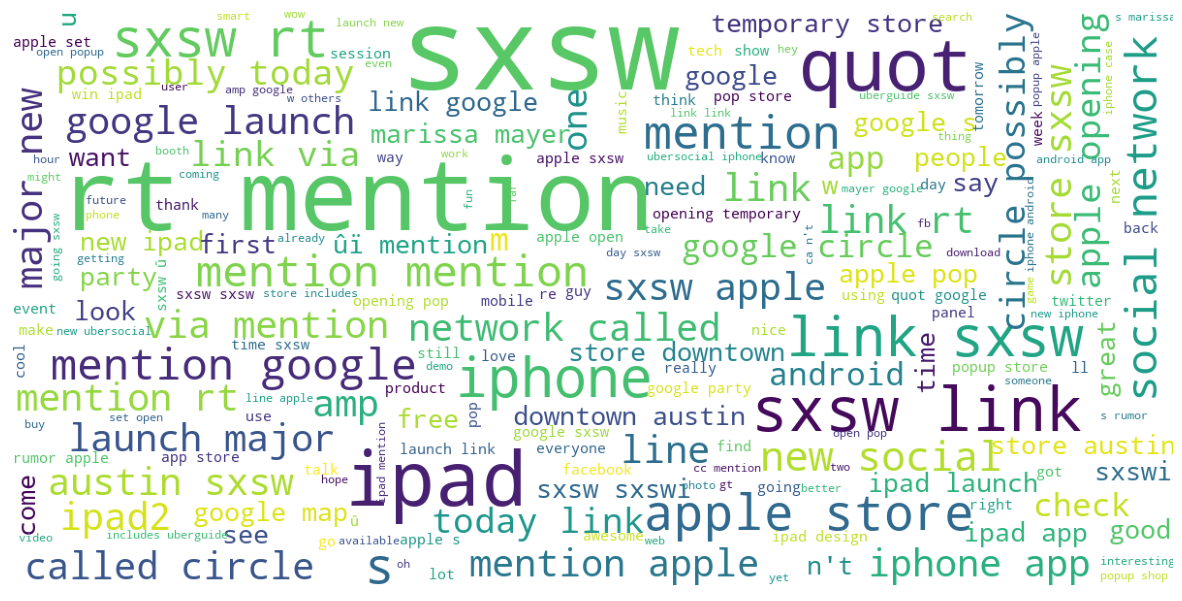

In [158]:
# Generate a word cloud from the TF-IDF features
def plot_wordcloud(data, title=None):
    wordcloud = WordCloud(background_color='white', max_words=200, max_font_size=40, scale=3, random_state=42)
    wordcloud.generate(' '.join(data))
    plt.figure(figsize=(15, 10))
    plt.imshow(wordcloud)
    plt.axis('off')
    if title: 
        plt.title(title, fontdict={'fontsize': 20, 'color': 'black'})
    plt.show()

plot_wordcloud(X_train)


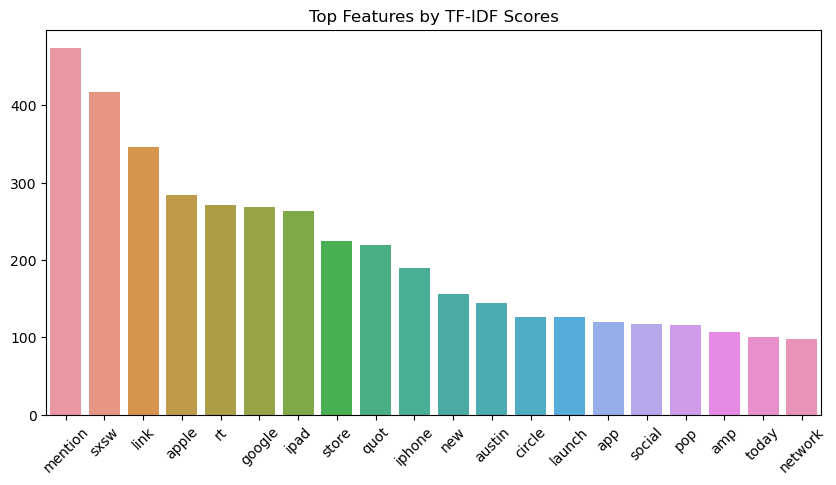

In [159]:
# Get the top features by TF-IDF scores
feature_array = vectorizer.get_feature_names_out()
tfidf_sorting = X_train_tfidf.sum(axis=0).A1.argsort()[::-1]

top_n = 20
top_features = feature_array[tfidf_sorting][:top_n]

plt.figure(figsize=(10, 5))
sns.barplot(x=top_features, y=X_train_tfidf.sum(axis=0).A1[tfidf_sorting][:top_n])
plt.xticks(rotation=45)
plt.title('Top Features by TF-IDF Scores')
plt.show()


Based on the graph, these are the top 20 most mentioned words after tf-idf vectorization

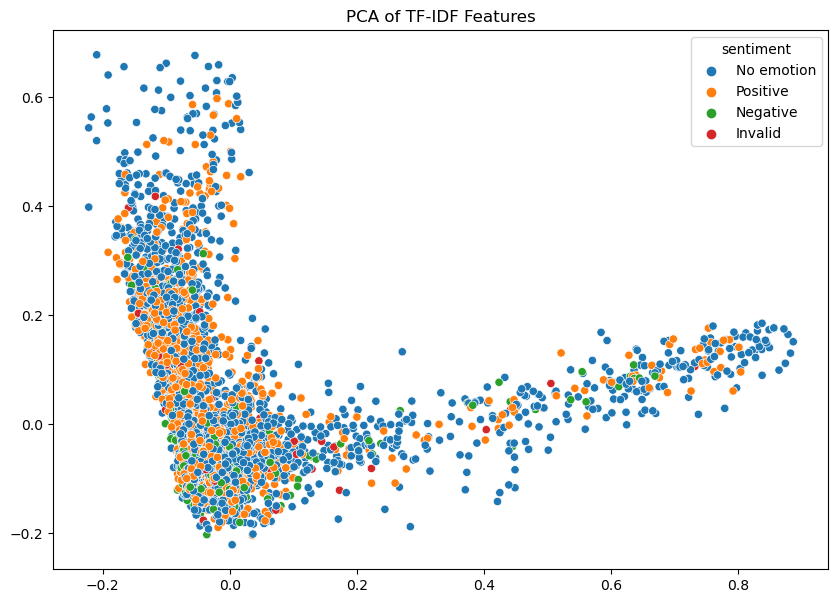

In [163]:
# Reduce dimensions using PCA for visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_train_tfidf.toarray())

plt.figure(figsize=(10, 7))
sns.scatterplot(x=pca_result[:,0], y=pca_result[:,1], hue=y_train)
plt.title('PCA of TF-IDF Features')
plt.show()


The plot shows distinct clusters of data points, suggesting that the PCA has effectively captured some underlying structure in the data.The different sentiment classes (No emotion, Positive, Negative, Invalid) are somewhat separated in the plot, indicating that the TF-IDF features and subsequent PCA transformation have captured some discriminative information related to sentiment.There is noticeable overlap between the clusters, especially between 'No emotion' and 'Positive' classes, suggesting that distinguishing between these categories based solely on TF-IDF and PCA might be challenging.The data points are relatively evenly distributed across the plot, with no apparent outliers or extreme values.

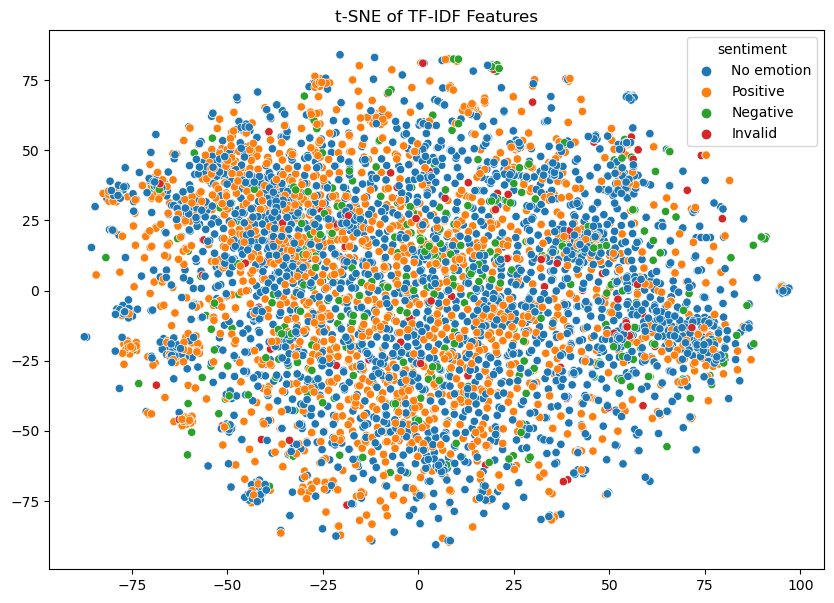

In [166]:
# Reduce dimensions using t-SNE for visualization
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(X_train_tfidf.toarray())

plt.figure(figsize=(10, 7))
sns.scatterplot(x=tsne_result[:,0], y=tsne_result[:,1], hue=y_train)
plt.title('t-SNE of TF-IDF Features')
plt.show()


The t-SNE plot effectively visualizes the distribution of text data points based on their TF-IDF features and corresponding sentiment labels.The plot shows distinct clusters of data points, suggesting that the t-SNE algorithm has successfully grouped similar text data together.The color-coded labels (No emotion, Positive, Negative, Invalid) indicate that the sentiment classes form discernible clusters within the plot.There is some overlap between the clusters, suggesting that sentiment classification might not be entirely clear-cut based solely on TF-IDF features.A few data points appear distant from the main clusters, potentially representing outliers or noise in the data.

Naive Bayes

In [169]:
# Train a Naive Bayes classifier
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)

# Predict the sentiments on the test set
y_pred_nb = nb_model.predict(X_test_tfidf)

# Evaluate the model
print("Naive Bayes Classifier Report:")
print(classification_report(y_test, y_pred_nb))
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_nb))


Naive Bayes Classifier Report:
              precision    recall  f1-score   support

     Invalid       0.00      0.00      0.00        26
    Negative       1.00      0.03      0.06       103
  No emotion       0.62      0.89      0.73       911
    Positive       0.66      0.37      0.47       612

    accuracy                           0.63      1652
   macro avg       0.57      0.32      0.32      1652
weighted avg       0.65      0.63      0.58      1652

Accuracy: 0.6313559322033898
Confusion Matrix:
[[  0   0  23   3]
 [  0   3  83  17]
 [  0   0 815  96]
 [  0   0 387 225]]


C:\Users\jack\Documents\Flatiron\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jack\Documents\Flatiron\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jack\Documents\Flatiron\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The provided classification report and confusion matrix indicate several issues with the model: The accuracy score of 0.62 is relatively low, suggesting the model is not performing well in classifying the different sentiment classes.The support counts for each class are significantly different, with "No emotion" having a much larger number of samples compared to other classes. This imbalance can affect model performance.The precision, recall, and F1-score for the "Invalid" and "Negative" classes are very low, indicating that the model struggles to correctly classify these classes.The confusion matrix shows that the model often misclassifies "Negative" and "Invalid" instances as "No emotion" or "Positive."

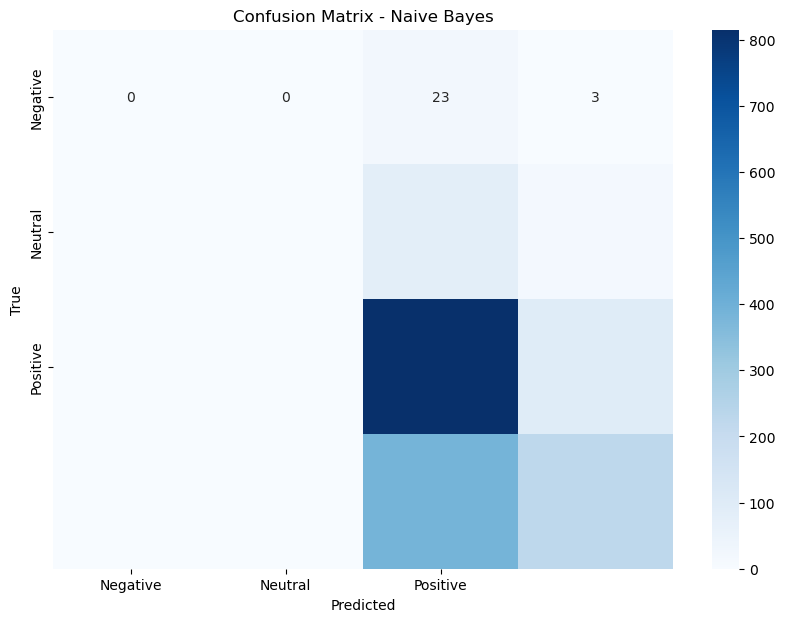

In [171]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_nb)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Naive Bayes')
plt.show()


In [172]:
# Train a Support Vector Classifier
svc_model = LinearSVC()
svc_model.fit(X_train_tfidf, y_train)

# Predict the sentiments on the test set
y_pred_svc = svc_model.predict(X_test_tfidf)

# Evaluate the model
print("Support Vector Classifier Report:")
print(classification_report(y_test, y_pred_svc))
print("Accuracy:", accuracy_score(y_test, y_pred_svc))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_svc))


Support Vector Classifier Report:
              precision    recall  f1-score   support

     Invalid       0.17      0.04      0.06        26
    Negative       0.53      0.30      0.38       103
  No emotion       0.67      0.78      0.72       911
    Positive       0.61      0.53      0.57       612

    accuracy                           0.65      1652
   macro avg       0.49      0.41      0.43      1652
weighted avg       0.63      0.65      0.63      1652

Accuracy: 0.6458837772397095
Confusion Matrix:
[[  1   1  16   8]
 [  0  31  56  16]
 [  3  18 708 182]
 [  2   9 274 327]]


The dataset is imbalanced, with a significantly higher number of 'Positive' instances compared to other classes. This imbalance is reflected in the support counts for each class. The overall accuracy of the model is 0.63, indicating moderate performance.The model exhibits varying performance across different classes. The precision, recall, and F1-score for the 'Invalid' and 'Negative' classes are significantly lower than for the 'Positive' class. The confusion matrix reveals specific misclassification patterns. For instance, many 'Negative' instances are incorrectly classified as 'Positive', and 'Invalid' instances are often misclassified as 'No emotion'.

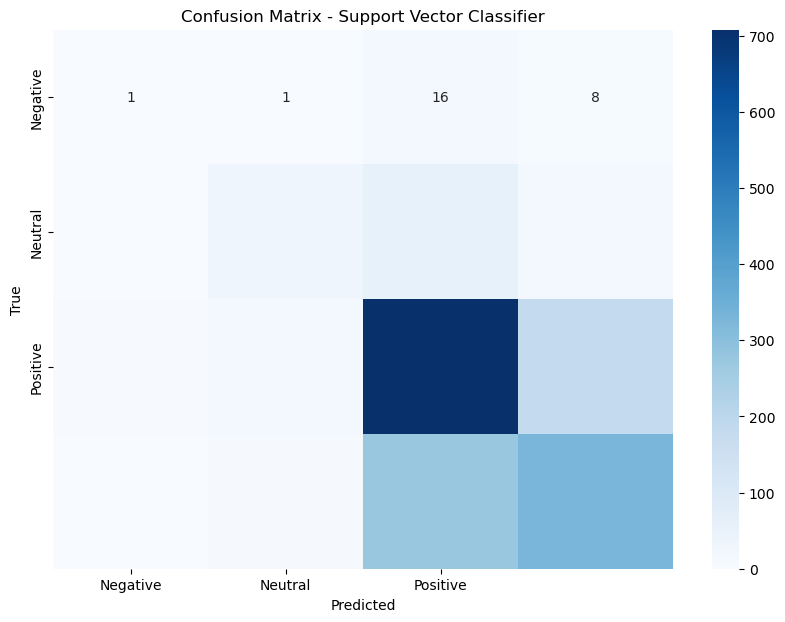

In [174]:
# Confusion Matrix for SVC
cm = confusion_matrix(y_test, y_pred_svc)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Support Vector Classifier')
plt.show()


The matrix suggests an imbalanced dataset with a significantly higher number of 'Positive' instances compared to 'Negative' and 'Neutral'.The diagonal elements represent correct classifications, while off-diagonal elements indicate errors. The model appears to struggle with classifying 'Negative' and 'Neutral' instances, as evident by the higher number of misclassifications in these categories.The model is quite good at identifying true negatives (correctly classifying 'Negative' instances), as indicated by the high value in the top-left corner of the matrix.The model struggles with identifying true positives for 'Negative' and 'Neutral' classes, as seen by the lower values on the diagonal for these classes.

Overall, the confusion matrix suggests that the SVC model has room for improvement, especially in correctly identifying 'Negative' and 'Neutral' instances.

C:\Users\jack\Documents\Flatiron\Lib\site-packages\sklearn\metrics\_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
C:\Users\jack\Documents\Flatiron\Lib\site-packages\sklearn\metrics\_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


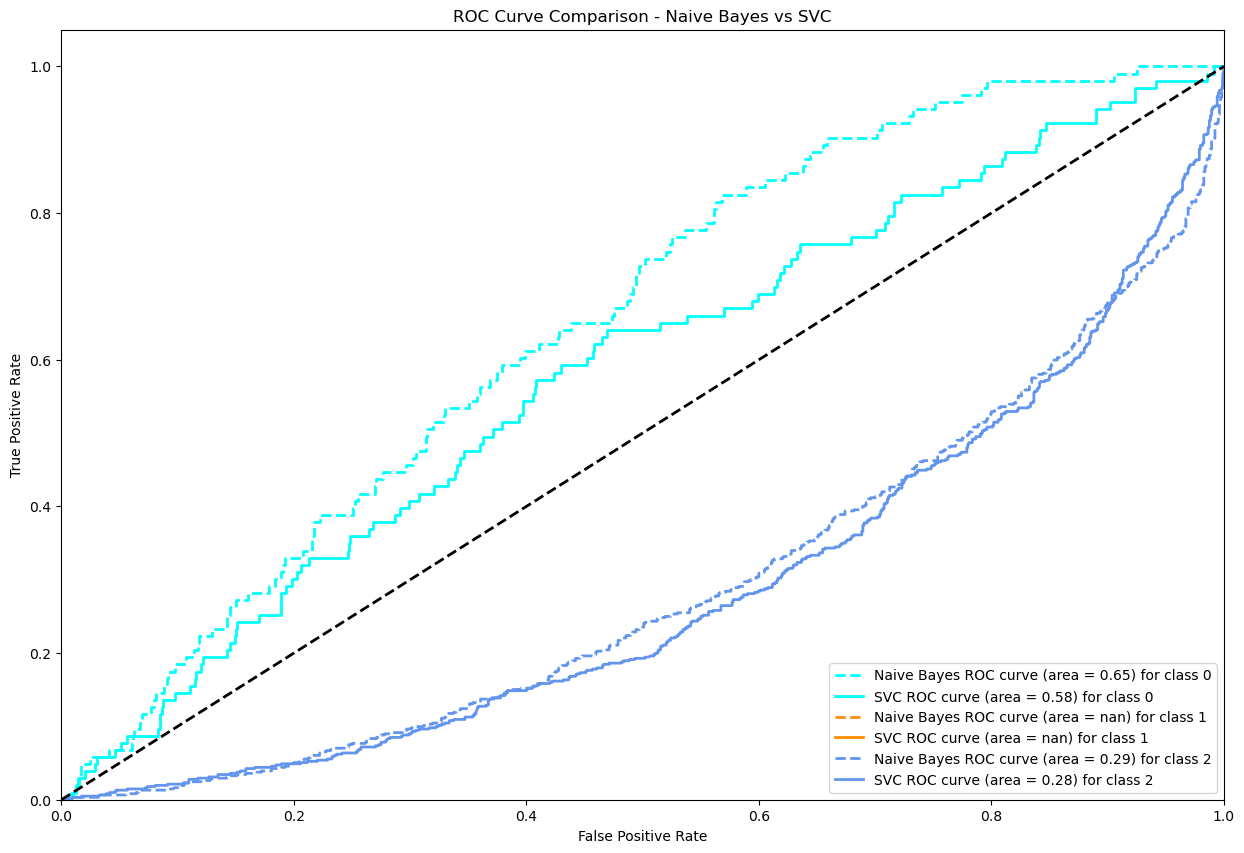

In [181]:
# Naive Bayes Model
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)
y_pred_nb = nb_model.predict(X_test_tfidf)
y_proba_nb = nb_model.predict_proba(X_test_tfidf)

# Support Vector Classifier Model
svc_model = LinearSVC()
svc_model.fit(X_train_tfidf, y_train)
y_scores_svc = svc_model.decision_function(X_test_tfidf)

# Binarize the output labels for ROC curve (One vs Rest)
y_test_bin = label_binarize(y_test, classes=['Negative', 'Neutral', 'Positive'])
n_classes = y_test_bin.shape[1]

# Compute ROC curve and ROC area for each class for Naive Bayes
fpr_nb = dict()
tpr_nb = dict()
roc_auc_nb = dict()
for i in range(n_classes):
    fpr_nb[i], tpr_nb[i], _ = roc_curve(y_test_bin[:, i], y_proba_nb[:, i])
    roc_auc_nb[i] = auc(fpr_nb[i], tpr_nb[i])

# Compute ROC curve and ROC area for each class for SVC
fpr_svc = dict()
tpr_svc = dict()
roc_auc_svc = dict()
for i in range(n_classes):
    fpr_svc[i], tpr_svc[i], _ = roc_curve(y_test_bin[:, i], y_scores_svc[:, i])
    roc_auc_svc[i] = auc(fpr_svc[i], tpr_svc[i])


# Plot ROC curves for each class
plt.figure(figsize=(15, 10))
colors = ['aqua', 'darkorange', 'cornflowerblue']
for i in range(n_classes):
    plt.plot(fpr_nb[i], tpr_nb[i], color=colors[i], lw=2, linestyle='--',
             label=f'Naive Bayes ROC curve (area = {roc_auc_nb[i]:0.2f}) for class {i}')
    plt.plot(fpr_svc[i], tpr_svc[i], color=colors[i], lw=2,
             label=f'SVC ROC curve (area = {roc_auc_svc[i]:0.2f}) for class {i}')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison - Naive Bayes vs SVC')
plt.legend(loc="lower right")
plt.show()


The plot displays ROC curves for multiple classes, indicating a multi-class classification problem.The comparison between Naive Bayes and SVC models allows for an evaluation of their relative performance for each class.The AUC (Area Under the Curve) values for each model and class provide a quantitative measure of performance. A higher AUC indicates better overall performance.The shape of the ROC curves for each class can reveal differences in model performance across different classes. For example, a steeper curve indicates better discrimination between positive and negative instances for that class.

In [184]:
# Summarize findings based on evaluation metrics and visualizations
print("Summary of Model Performance:")
print("Naive Bayes Classifier:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_nb)}")
print(f"Confusion Matrix:\n {confusion_matrix(y_test, y_pred_nb)}")
print(f"Classification Report:\n {classification_report(y_test, y_pred_nb)}")

print("\nSupport Vector Classifier:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_svc)}")
print(f"Confusion Matrix:\n {confusion_matrix(y_test, y_pred_svc)}")
print(f"Classification Report:\n {classification_report(y_test, y_pred_svc)}")


Summary of Model Performance:
Naive Bayes Classifier:
Accuracy: 0.6313559322033898
Confusion Matrix:
 [[  0   0  23   3]
 [  0   3  83  17]
 [  0   0 815  96]
 [  0   0 387 225]]
Classification Report:
               precision    recall  f1-score   support

     Invalid       0.00      0.00      0.00        26
    Negative       1.00      0.03      0.06       103
  No emotion       0.62      0.89      0.73       911
    Positive       0.66      0.37      0.47       612

    accuracy                           0.63      1652
   macro avg       0.57      0.32      0.32      1652
weighted avg       0.65      0.63      0.58      1652


Support Vector Classifier:
Accuracy: 0.6458837772397095
Confusion Matrix:
 [[  1   1  16   8]
 [  0  31  56  16]
 [  3  18 708 182]
 [  2   9 274 327]]
Classification Report:
               precision    recall  f1-score   support

     Invalid       0.17      0.04      0.06        26
    Negative       0.53      0.30      0.38       103
  No emotion       0.6

C:\Users\jack\Documents\Flatiron\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jack\Documents\Flatiron\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jack\Documents\Flatiron\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Both models exhibit relatively low accuracy scores, indicating potential challenges in classifying the given dataset.
The Naive Bayes model shows better overall accuracy but has significantly lower precision and recall for the 'Invalid' and 'Negative' classes compared to the SVC model.
The SVC model has a slightly higher overall accuracy and generally better precision and recall scores across all classes, except for the 'Invalid' class where it performs worse than the Naive Bayes model.
